#### Path similarity

I. Towards writing clear instructions

1. Towards a concise and detailed query.

First prompt (simple) in English and Darija. Input is in Darija.


In [1]:
from openai import OpenAI
import pandas as pd
df = pd.read_csv('verbs.csv')

client = OpenAI()

def p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "ترجم الفعل المعطي بالدارجة المغربية لنجليزية."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p1_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": "Translate the provided Moroccan Darija dialect verb into English."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
                ],
        temperature=0
    )
    return completion.choices[0].message.content

def p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
messages = [
            {"role": "system", 
             "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لنجليزية." +
                "الترجمة خصها تكون فعل مجرد المصدر بلا تفسيرات."
             },
            {"role": "user", 
             "content": f"{verb}"
             },
],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p2_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", 
             "content": 
                "Translate the provided Moroccan Darija dialect verb into English." + 
                "The translation must be a bare-infinitive verb without explanations."
            },
            {"role": "user", 
             "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
messages = [
            {"role": "system", "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر." +
                "الترجمة خص يكون فيها غير جذر الفعل المترجم بلا تفسيرات."
             },
            {"role": "user", "content": f"{verb}"},
],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p3_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": 
                "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb. " + 
                "The translation must contain only the lemma of the translated verb with no explanations."},
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def p4_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
                "role": "system",
                "content": 
                "ترجم الفعل المعطي بالدارجة المغربية لفعل انجليزي مجرد المصدر." +
                " تبع هاد الشروط ونتا كترجم: " +
                "1- متعطيش تفسيرات، غير الترجمة صافي. 2- الترجمة خص يكون فيها غير جذر الفعل المترجم"
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
        ],
        temperature=0
    )
    return completion.choices[0].message.content

def eng_p4_translate_(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages = [
            {
            "role": "system",
            "content": "Translate the provided Moroccan Darija dialect verb into a bare-infinitive English verb." + 
             " Please fulfill the following conditions when translating:"+
             " 1- Do not give explanations in the output, only the translation. 2- The translation must contain only the lemma of the translated verb."
            },
            {
                "role": "user", 
                "content": f"{verb}"
            }
                ],
        temperature=0
    )
    return completion.choices[0].message.content



In [2]:

dataset = df.copy()
columns_to_delete = ['n1','n2', 'n3', 'n4', 'n5', 'n6']
dataset.drop(columns=columns_to_delete, inplace=True)

dataset['p1_transl'] = dataset['darija_ar'].apply(p1_translate_)
dataset['eng_p1_transl'] = dataset['darija_ar'].apply(eng_p1_translate_)
dataset['p2_transl'] = dataset['darija_ar'].apply(p2_translate_)
dataset['eng_p2_transl'] = dataset['darija_ar'].apply(eng_p2_translate_)
dataset['p3_transl'] = dataset['darija_ar'].apply(p3_translate_)
dataset['eng_p3_transl'] = dataset['darija_ar'].apply(eng_p3_translate_)
dataset['p4_transl'] = dataset['darija_ar'].apply(p4_translate_)
dataset['eng_p4_transl'] = dataset['darija_ar'].apply(eng_p4_translate_)

In [3]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn


eng = dataset['eng']
p1_transl = dataset['p1_transl']
eng_p1_transl = dataset['eng_p1_transl']
p2_transl = dataset['p2_transl']
eng_p2_transl = dataset['eng_p2_transl']
p3_transl = dataset['p3_transl']
eng_p3_transl = dataset['eng_p3_transl']
p4_transl = dataset['p4_transl']
eng_p4_transl = dataset['eng_p4_transl']


p1_transl = [verb.replace(" ", "_") for verb in p1_transl]
eng_p1_transl = [verb.replace(" ", "_") for verb in eng_p1_transl]
p2_transl = [verb.replace(" ", "_") for verb in p2_transl]
eng_p2_transl = [verb.replace(" ", "_") for verb in eng_p2_transl]
p3_transl = [verb.replace(" ", "_") for verb in p3_transl]
eng_p3_transl = [verb.replace(" ", "_") for verb in eng_p3_transl]
p4_transl = [verb.replace(" ", "_") for verb in p4_transl]
eng_p4_transl = [verb.replace(" ", "_") for verb in eng_p4_transl]

eng = [verb.replace(" ", "_") for verb in eng]


def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score

def evaluate_pairs(transl,threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results

results_p1 = evaluate_pairs(p1_transl)
results_eng_p1 = evaluate_pairs(eng_p1_transl)
results_p2 = evaluate_pairs(p2_transl)
results_eng_p2 = evaluate_pairs(eng_p2_transl)
results_p3 = evaluate_pairs(p3_transl)
results_eng_p3 = evaluate_pairs(eng_p3_transl)
results_p4 = evaluate_pairs(p4_transl)
results_eng_p4 = evaluate_pairs(eng_p4_transl)

dataset['similariy_p1'] = [item[2] for item in results_p1]
dataset['similarity_eng_p1'] = [item[2] for item in results_eng_p1]
dataset['similarity_p2'] = [item[2] for item in results_p2]
dataset['similarity_eng_p2'] = [item[2] for item in results_eng_p2]
dataset['similarity_p3'] = [item[2] for item in results_p3]
dataset['similarity_eng_p3'] = [item[2] for item in results_eng_p3]
dataset['similarity_p4'] = [item[2] for item in results_p4]
dataset['similarity_eng_p4'] = [item[2] for item in results_eng_p4]

p1_s = dataset['similariy_p1']
ep1_s = dataset['similarity_eng_p1']
p2_s = dataset['similarity_p2'] 
ep2_s = dataset['similarity_eng_p2'] 
p3_s = dataset['similarity_p3'] 
ep3_s = dataset['similarity_eng_p3'] 
p4_s = dataset['similarity_p4'] 
ep4_s = dataset['similarity_eng_p4']

p1= dataset['similariy_p1'].mean()
ep1= dataset['similarity_eng_p1'].mean()
p2= dataset['similarity_p2'].mean()
ep2= dataset['similarity_eng_p2'].mean()
p3= dataset['similarity_p3'].mean()
ep3= dataset['similarity_eng_p3'].mean()
p4= dataset['similarity_p4'].mean()
ep4= dataset['similarity_eng_p4'].mean()

print(f'Mean value of similarities in the first darija prompt is: {p1}')
print(f'Mean value of similarities in the first english prompt is: {ep1}')
print(f'Mean value of similarities in the second darija prompt is: {p2}')
print(f'Mean value of similarities in the second englsih prompt is: {ep2}')
print(f'Mean value of similarities in the third darija prompt is: {p3}')
print(f'Mean value of similarities in the third english prompt is: {ep3}')
print(f'Mean value of similarities in the fourth darija prompt is: {p4}')
print(f'Mean value of similarities in the fourth english prompt is: {ep4}')
dataset.describe()



Mean value of similarities in the first darija prompt is: 0.47459542503147156
Mean value of similarities in the first english prompt is: 0.4364428933469631
Mean value of similarities in the second darija prompt is: 0.5278369348136791
Mean value of similarities in the second englsih prompt is: 0.48015021154556037
Mean value of similarities in the third darija prompt is: 0.5872542320943483
Mean value of similarities in the third english prompt is: 0.5877156569743779
Mean value of similarities in the fourth darija prompt is: 0.5688556840446375
Mean value of similarities in the fourth english prompt is: 0.5853785399570283


,similariy_p1,similarity_eng_p1,similarity_p2,similarity_eng_p2,similarity_p3,similarity_eng_p3,similarity_p4,similarity_eng_p4
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,0.474595,0.436443,0.527837,0.480150,0.587254,0.587716,0.568856,0.585379
std,0.435478,0.438804,0.422941,0.429208,0.375901,0.390527,0.384101,0.387996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,0.000000,0.250000,0.250000,0.250000,0.250000
50%,0.333333,0.250000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Histograms comparaison:

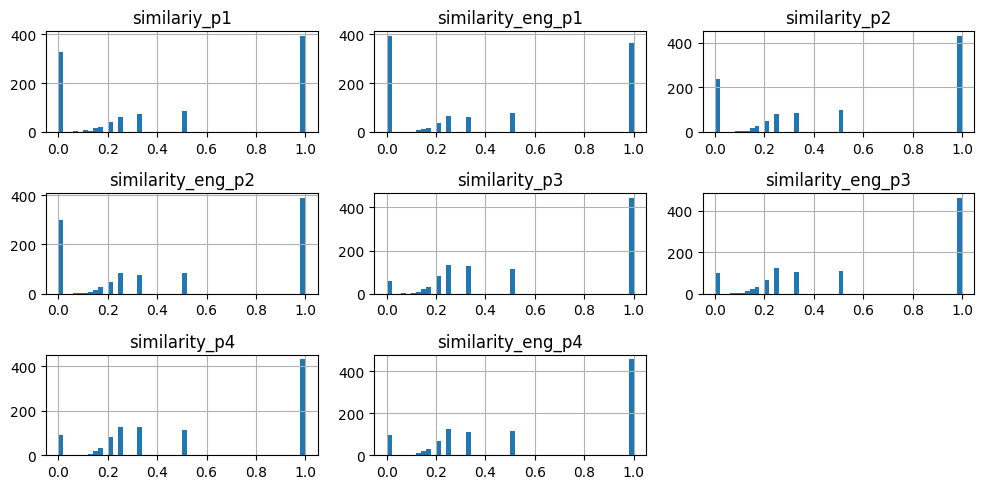

In [4]:
import matplotlib.pyplot as plt

dataset.hist(bins=50, figsize=(10,5))
plt.tight_layout()
plt.grid(True)
plt.show()


In [6]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similariy_p1'], x=dataset['similariy_p1'], name="Count of similarities in first Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p2'], x=dataset['similarity_p2'], name="Count of similarities in second Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p3'], x=dataset['similarity_p3'], name="Count of similarities in third Darija prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_p4'], x=dataset['similarity_p4'], name="Count of similarities in fourth Darija prompt"))

fig.show()


In [8]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p1'], x=dataset['similarity_eng_p1'], name="Count of similarities in first English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p2'], x=dataset['similarity_eng_p2'], name="Count of similarities in second English prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p3'], x=dataset['similarity_eng_p3'], name="Count of similarities in third Englsih prompt"))
fig.add_trace(go.Histogram(histfunc="count", y=dataset['similarity_eng_p4'], x=dataset['similarity_eng_p4'], name="Count of similarities in fourth English prompt"))

fig.show()

In [15]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(p4_s, ep4_s)


print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference between the fourth prompts written in English and Darija")
else:
    print("No significant difference between the frouth prompts written in English and Darija")

F-statistic: 0.36695327693442004
P-value: 0.5447363652030491
No significant difference between the frouth prompts written in English and Darija


In [16]:
print('filtered Darija prompt of less than 0.2 similarity')
filtered_p4 = [x for x in results_p4 if x[2] < 0.2]
print(filtered_p4)

print('filtered English prompt of less than 0.2 similarity')
filtered_p4 = [x for x in results_eng_p4 if x[2] < 0.2]
print(filtered_p4)

filtered Darija prompt of less than 0.2 similarity
[('No.', 'eat', 0, False), ('to_do', 'swim', 0, False), ('Go', 'bargain', 0.16666666666666666, False), ('Wipe', 'clean', 0.16666666666666666, False), ('Salam_(to_greet)', 'salute', 0, False), ('Get_angry', 'anger', 0, False), ('دير', 'say', 0, False), ('To_go', 'become', 0, False), ('Lose', 'should', 0, False), ('Thank.', 'thank', 0, False), ('Refuse', 'suppose', 0.16666666666666666, False), ('Hello', 'sit_down', 0, False), ('To_eat', 'send', 0, False), ('to_hear', 'listen', 0, False), ('Tag', 'trust', 0.16666666666666666, False), ('Getting_married', 'marry', 0, False), ('Show_us', 'exercise', 0, False), ('Confess', 'recognize', 0.16666666666666666, False), ('Thank_you', 'doubt', 0, False), ('Sleep', 'intent', 0, False), ('Okay', 'cook', 0.1111111111111111, False), ('Encourage', 'question', 0.16666666666666666, False), ('Expect', 'predict', 0.14285714285714285, False), ('Write', 'used_to', 0, False), ('"like"', 'smoke', 0, False), ('Tr

In [21]:
import plotly.express as px

dataset['triple_verbs'] = 'Labels:' + dataset['eng'] + ', ' + dataset['darija_ar'] + '; outputs: ' + dataset['p4_transl'] + ', ' + dataset['eng_p4_transl']

# Create the scatter plot with custom hover data
fig = px.scatter(
    dataset,
    x='similarity_p4',
    y='similarity_eng_p4',
    hover_name='triple_verbs',
    hover_data={
        'similarity_p4': True,
        'similarity_eng_p4': True,
    }
)

# Customize the marker properties
fig.update_traces(
    marker=dict(size=10, opacity=0.1),
    text=dataset['eng'],
    textposition='top center'
)

# Show the plot
fig.show()

In [22]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(p4_s, ep4_s, ep5_s, p5_s)


print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference between the fourth prompts written in English and Darija")
else:
    print("No significant difference between the frouth prompts written in English and Darija")

F-statistic: 1.6300197985699865
P-value: 0.1802032263416439
No significant difference between the frouth prompts written in English and Darija


In [23]:
print('filtered Darija prompt of less than 0.2 similarity')
filtered_p5 = [x for x in results_p4 if x[2] < 0.2]
print(filtered_p5)

print('filtered English prompt of less than 0.2 similarity')
filtered_p5 = [x for x in results_eng_p4 if x[2] < 0.2]
print(filtered_p5)

filtered Darija prompt of less than 0.2 similarity
[('No.', 'eat', 0, False), ('to_do', 'swim', 0, False), ('Go', 'bargain', 0.16666666666666666, False), ('Wipe', 'clean', 0.16666666666666666, False), ('Salam_(to_greet)', 'salute', 0, False), ('Get_angry', 'anger', 0, False), ('دير', 'say', 0, False), ('To_go', 'become', 0, False), ('Lose', 'should', 0, False), ('Thank.', 'thank', 0, False), ('Refuse', 'suppose', 0.16666666666666666, False), ('Hello', 'sit_down', 0, False), ('To_eat', 'send', 0, False), ('to_hear', 'listen', 0, False), ('Tag', 'trust', 0.16666666666666666, False), ('Getting_married', 'marry', 0, False), ('Show_us', 'exercise', 0, False), ('Confess', 'recognize', 0.16666666666666666, False), ('Thank_you', 'doubt', 0, False), ('Sleep', 'intent', 0, False), ('Okay', 'cook', 0.1111111111111111, False), ('Encourage', 'question', 0.16666666666666666, False), ('Expect', 'predict', 0.14285714285714285, False), ('Write', 'used_to', 0, False), ('"like"', 'smoke', 0, False), ('Tr

In [24]:
f_stat1, p_value1 = f_oneway(p4_s, p5_s,)


print(f"F-statistic: {f_stat1}")
print(f"P-value: {p_value1}")

if p_value < 0.05:
    print("Significant difference between the fourth prompts written in English and Darija")
else:
    print("No significant difference between the frouth prompts written in English and Darija")

F-statistic: 2.1059268866082204
P-value: 0.14688152058345288
No significant difference between the frouth prompts written in English and Darija


In [25]:
f_stat2, p_value2 = f_oneway(ep4_s, ep5_s,)


print(f"F-statistic: {f_stat2}")
print(f"P-value: {p_value2}")

if p_value < 0.05:
    print("Significant difference between the fourth prompts written in English and Darija")
else:
    print("No significant difference between the frouth prompts written in English and Darija")

F-statistic: 0.10376066012053226
P-value: 0.7473951861381086
No significant difference between the frouth prompts written in English and Darija


In [29]:
import plotly.express as px

dataset['triple_verbs'] = 'Labels:' + dataset['eng'] + ', ' + dataset['darija_ar'] + '; outputs: ' + dataset['p4_transl'] + ', ' + dataset['p5_transl']

# Create the scatter plot with custom hover data
fig = px.scatter(
    dataset,
    x='similarity_p4',
    y='similariy_p5',
    hover_name='triple_verbs',
    hover_data={
        'similarity_p4': True,
        'similariy_p5': True,
    }
)

# Customize the marker properties
fig.update_traces(
    marker=dict(size=10, opacity=0.1),
    text=dataset['eng'],
    textposition='top center'
)

# Show the plot
fig.show()